In [5]:
from analysis.simulations import VAR
from analysis.probabilities import KNN, KDE
from analysis.directed_information import *
import analysis.utils as utils

In [6]:
# generate random, stable VAR(p)
n_vars = 3
p = 1
var = VAR(m=n_vars, order=p)
var.generate(max_coefficients=2)

var

VAR(1): X_t = A_1 * X_t-1 + N_t
A_1 = 
array([[ 0.31531855,  0.        ,  0.        ],
       [-0.71074893,  0.        , -0.57289082],
       [ 0.        , -0.88696403,  0.        ]])

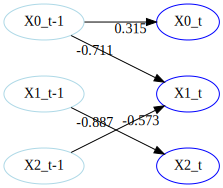

In [7]:
# visualization the VAR(p) model
labels = [f'X{i}' for i in range(n_vars)]
utils.plot_directed_graph(draw='var', data=var.get_coefficients(), labels=labels)

In [8]:
# simulate time series produced by VAR(p)
timeseries = var.simulate(steps=5000)

[[0.04995457 0.20839479 0.        ]
 [0.         0.         0.55759882]
 [0.         0.34256579 0.        ]]


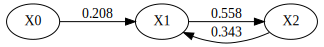

In [9]:
# calculate exact directed information for each variable
di, dig = var.directed_information_graph(threshold=0.05)

print(di)
dig

[[0.03578513 0.17206423 0.        ]
 [0.         0.         0.5262968 ]
 [0.         0.31073648 0.        ]]


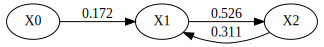

In [10]:
# esimate directed information using k-nearest neigbor
knn = KNN()
di, dig = directed_information_graph(samples=timeseries, labels=labels, threshold=0.05, order=var.order, estimator=knn)

print(di)
dig